## M 10 Project 3

## Part 1: data Loading 
### 1.1 Upload data from AIM 5001 Github Repository

In [2]:
import pandas as pd
import numpy as np
from numpy import nan as NA
df = pd.read_csv('https://raw.githubusercontent.com/JuJu-Ren/AIM-5001/main/M10_Data.csv', header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


### 1.2 Assign column names
* Assign meaningful column headings to the content of the dataframe based on the information provided at the UCI web link provided above.

####  Attribute Information:

1. symboling: -3, -2, -1, 0, 1, 2, 3. (object)
2. normalized-losses: continuous from 65 to 256. (int64)
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo (object)
4. fuel-type: diesel, gas. (object)
5. aspiration: std, turbo. (object)
6. num-of-doors: four, two. (object)
7. body-style: hardtop, wagon, sedan, hatchback, convertible. (object)
8. drive-wheels: 4wd, fwd, rwd. (object)
9. engine-location: front, rear. (object)
10. wheel-base: continuous from 86.6 120.9. (float64)
11. length: continuous from 141.1 to 208.1. (float64)
12. width: continuous from 60.3 to 72.3. (float64)
13. height: continuous from 47.8 to 59.8. (float64)
14. curb-weight: continuous from 1488 to 4066. (int64)
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. (object)
16. num-of-cylinders: eight, five, four, six, three, twelve, two. (object)
17. engine-size: continuous from 61 to 326. (int64)
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. (object)
19. bore: continuous from 2.54 to 3.94. (float64)
20. stroke: continuous from 2.07 to 4.17. (float64)
21. compression-ratio: continuous from 7 to 23. (int64)
22. horsepower: continuous from 48 to 288. (int64)
23. peak-rpm: continuous from 4150 to 6600. (int64)
24. city-mpg: continuous from 13 to 49.(int64)
25. highway-mpg: continuous from 16 to 54.(int64)
26. price: continuous from 5118 to 45400.(int64)

In [3]:
df = df.rename(columns={0:'symboling', 1:'normalized-losses', 2:'make', 3:'fuel-type', 4:'aspiration',
                        5:'num-of-doors',6:'body-style',7:'drive-wheels',8:'engine-location',9:'wheel-base',
                        10:'length',11:'width',12:'height',13:'curb-weight',14:'engine-type',15:'num-of-cylinders',
                        16:'engine-size',17:'fuel-system',18:'bore',19:'stroke',20:'compression-ratio',21:'horsepower',
                       22:'peak-rpm', 23:'city-mpg',24:'highway-mpg',25:'price'})
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


## Part 2:Exploratory Data Analysis
### 2.1 Clean data
#### 2.1.1 Check data information

We can notice there are missing values are filled in as "?" in the dataset, we are change all "?" into Nan

In [4]:
df = df.replace('?', np.nan)
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [47]:
df.shape

(205, 26)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### 2.1.2 Find missing data

In [49]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Missing values are in the following attributes:
"normalized-losses","nom-of-doors","bore","stroke","horsepower","peak-rpm","price"

We can notice there are a few attributes are miss classified as object datatype. We are restoring the datatype for those attributes to the ones fits the attribute destribtion.

In [5]:
df = df.astype({'symboling': 'object','normalized-losses':'float64','bore':'float64',
          'stroke':'float64','horsepower':'float64','peak-rpm':'float64','price':'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    object 
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We can see there are 15 numerical attributes and 11 categorical attributes

<br> In the attributes we changed above, only "nom of doors" is a categorical value and all others are numerical value
#### 2.1.3 Filling missing data- Numerical Data into "new_df"
We can fill in the numerical missing values with the mean number of the colum:
"normalized-losses", "bore","stroke","horsepower","peak-rpm","price"

In [53]:
# "normalized-losses":1, "bore":18, "stroke":19,"horsepower":21, "peak-rpm":22. "price":25
new_df = df.copy()
list_nd = [1, 18, 19, 21, 22, 25]
for i in list_nd:
    new_df.iloc[:, i] = new_df.iloc[:, i].fillna(value = new_df.iloc[:, i].mean())
new_df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


#### 2.1.3 Filling missing data- Categorical Data


In [56]:
new_df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [57]:
new_df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

* since there are only 2 missing data in this column. we can just simply filling those data with the most frequency category:'four'

In [58]:
# 'num-of-doors':5
new_df.iloc[:, 5] = new_df.iloc[:, 5].fillna(value = 'four')

In [59]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    object 
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

For now we have cleaned all missing values in the dataframe

### 2.2 Provide summary statistics for each attribute

In [60]:
df.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 2.3 provide appropriate graphical analysis for each attribute

### 2.3.1 Plot histogram chart of all numerical attributes

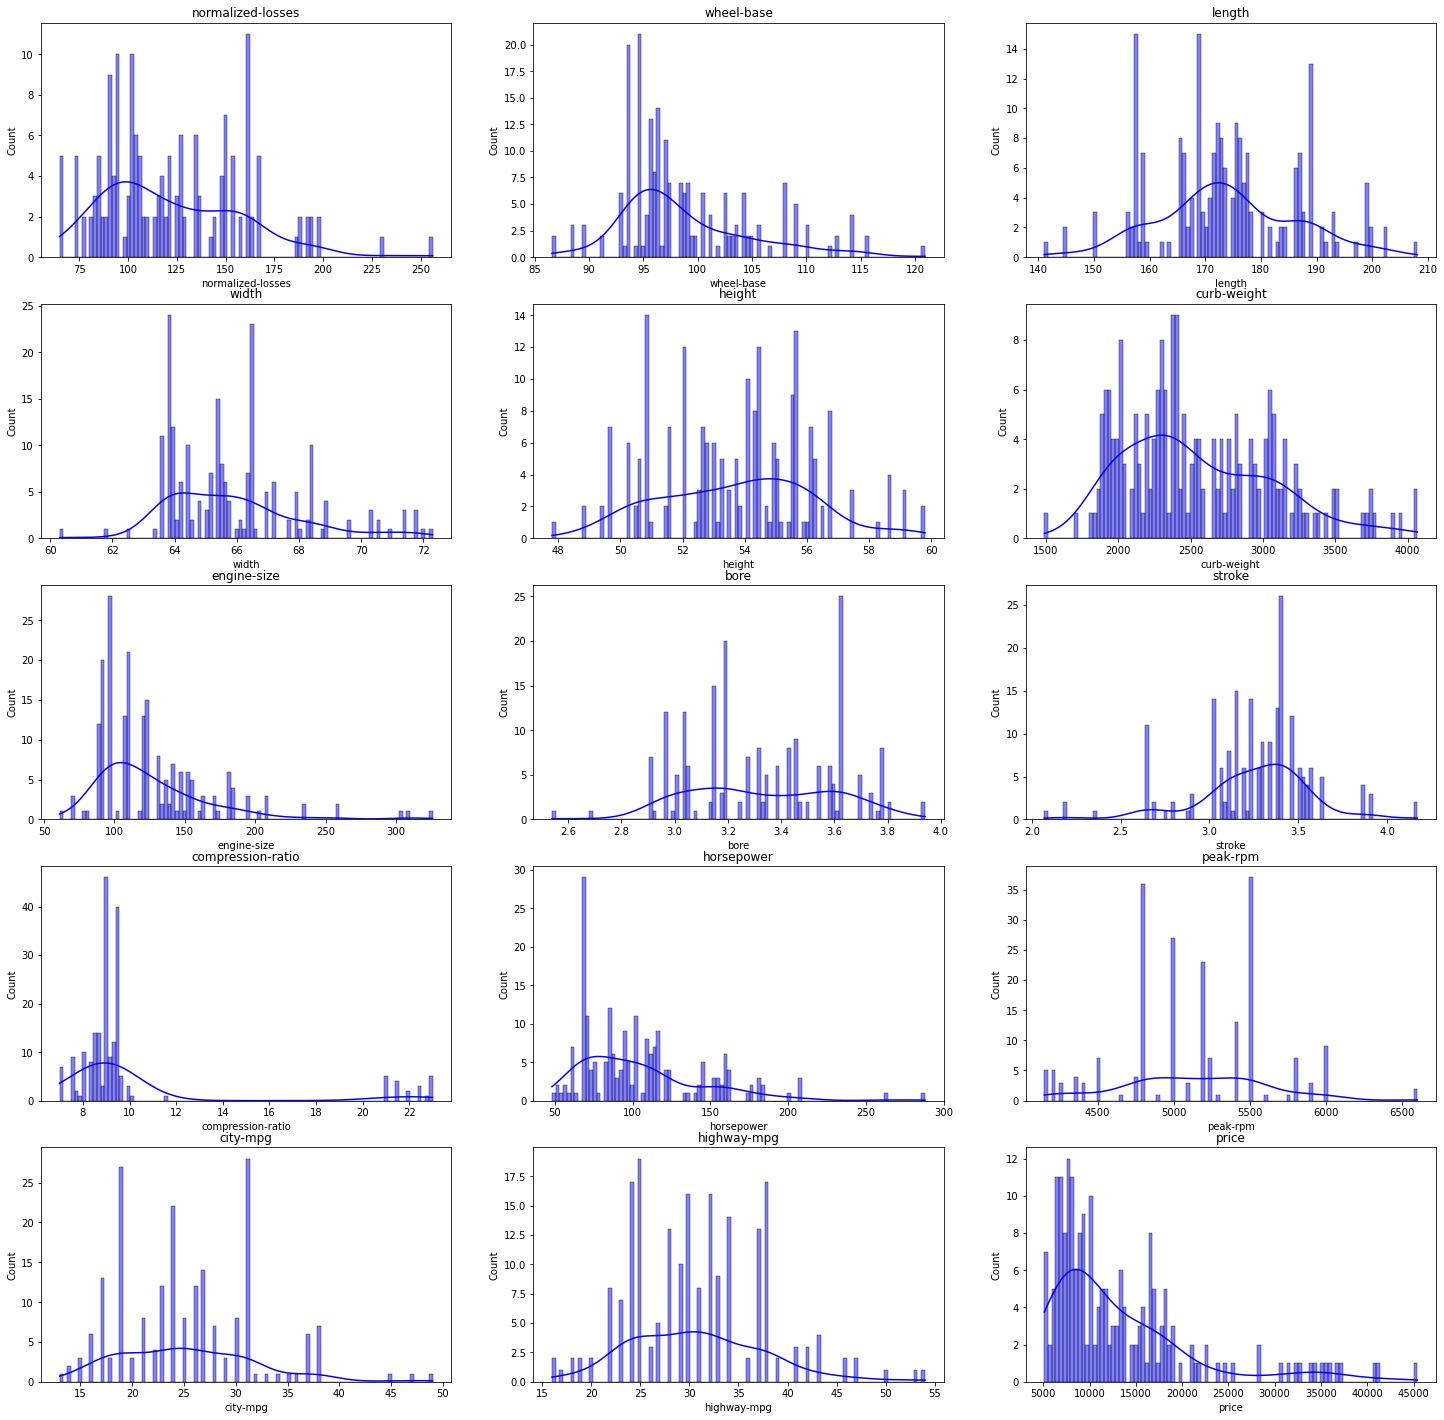

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
# Seaborn histogram plot
plt.figure(figsize = (25, 25))
for i, col in enumerate(list(df[["normalized-losses", "wheel-base", "length","width",
                                     "height","curb-weight","engine-size","bore","stroke","compression-ratio",
                                    "horsepower","peak-rpm","city-mpg","highway-mpg","price"]].columns.values)):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df[col], color = 'b', kde = True, bins = 100)
    plt.title(col)

From the charts above we can see "length" and "curb-weight"colums are close to the normal distribution.

### 2.3.2 Plot bar chart of all categorical attributes

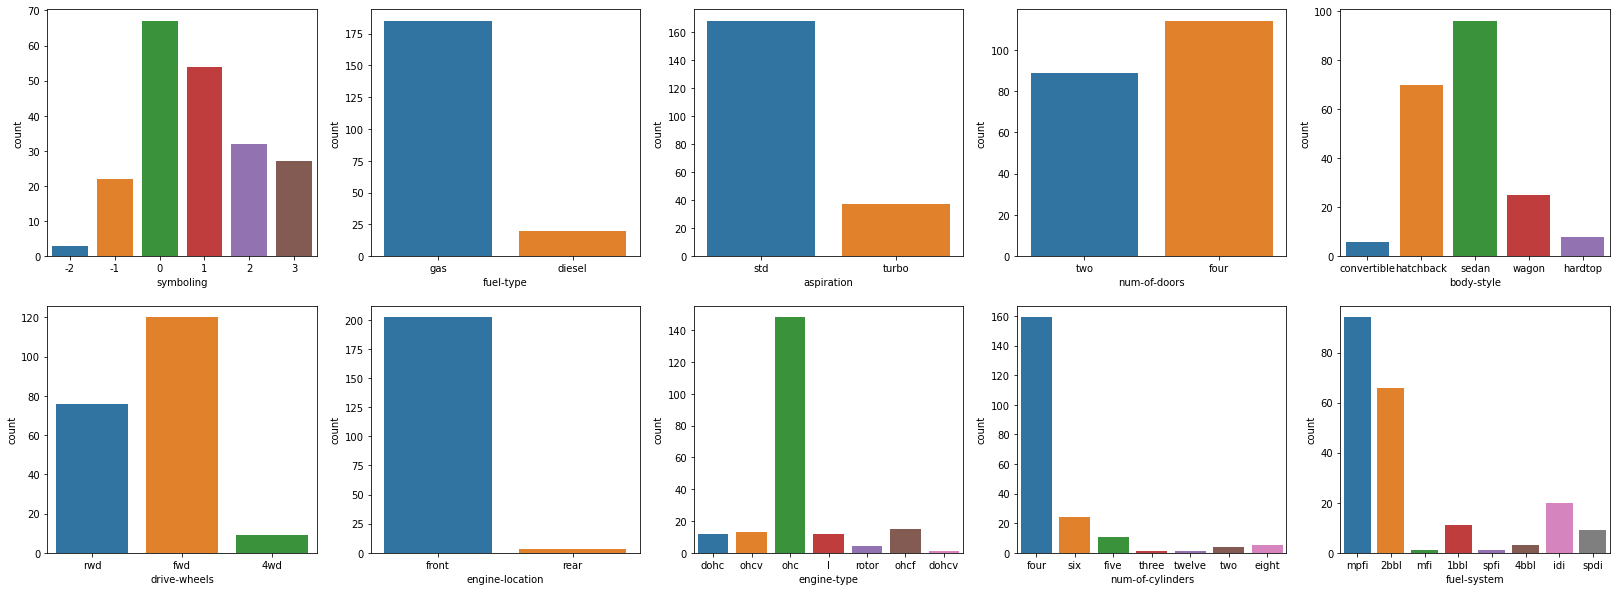

In [62]:
# Seaborn plot bar chart
plt.figure(figsize = (28, 10))
for i, col in enumerate(list(df[["symboling", "fuel-type","aspiration","num-of-doors",
                                 "body-style","drive-wheels","engine-location","engine-type",
                                 "num-of-cylinders","fuel-system"]].columns.values)):
    plt.subplot(2, 5, i + 1)
    sns.countplot(x=df[col])#, order=df[col].value_counts().index)

As we can see from the charts above:
* "symboling": A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. As we can see from the chart, most cars are with the 0 and +1, and the amount of safe cars (<0) is less than the amount of risky autos (>0)
* "fuel-type": There are around 9 times veichles using gas than diesel
* "aspiration": There are 4 times of auto using standard engines than turbocharged engines.
* "nom-of-doors": More cars using four doors than two doors, but still the 2 door auto having taken around 40% market
* "body-style": from the chart we can clearly see that "hatchback" and "sedan" are the most popular styles to choose, these two arrtibutes take over the majority market.
* "drive-wheels": we can see the forward wheel drive is the most popular one, and rear wheel drive auto also takes over a big market, and the 4 wheels drive type of auto remain a very low percentage in the market
* "engine-location": Only a very low percentage of autos having the engine at the rear.
* "engine-type": Overhead Camshaft (OHC) Engines are the most common ones in the market, takes over around 60% of the market. The rest types of engines distribute evenly.
* "num-of-cylinders": Four cylinders auto is the most popular ones, takes over around 65% of the market. Three cylinders and twelve cylinders auto are the least popular ones.
* "fuel-system": Multi Point Fuel Injection (MPFI) and 2 Barrel Fuel Injection(2BBI) are the most popular ones, they have taken over around 65% of the market.

<AxesSubplot:xlabel='make', ylabel='count'>

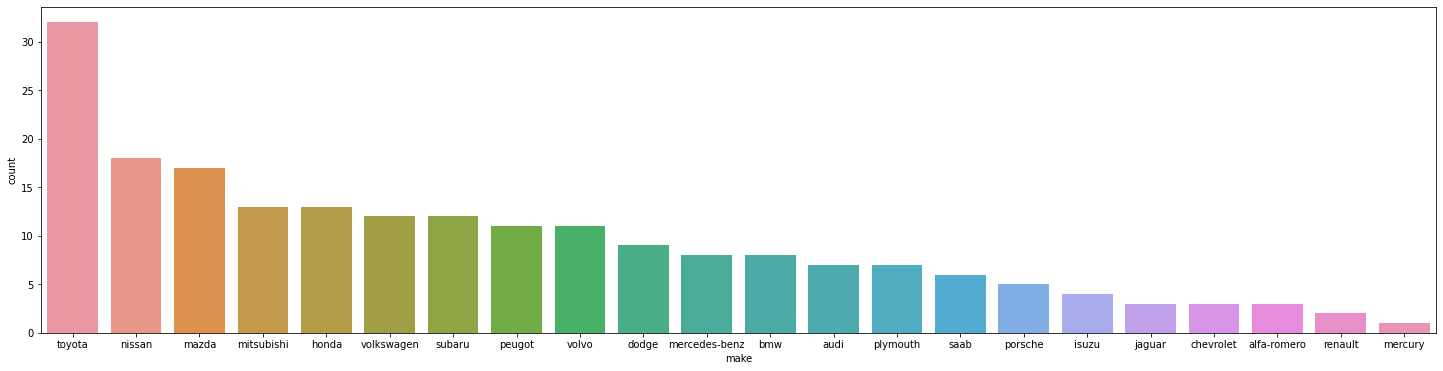

In [63]:
plt.figure(figsize = (25, 6))
sns.countplot(x=df["make"], order=df["make"].value_counts().index)

* This factor shows the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. Most Japanese brand cars are ranked in the front, which means the average loss per year per car is more than other brands in the same size classification.

## Part 3: Data Preparation & Feature Engineering
### 3.1 Question 1
Which numeric variables contained within the data set appear to require the use of a 
feature scaling method for purposes of preparing them for use within a machine learning algorithm? 
Be sure to list each relevant variable and explain why you believe each variable that you’ve identified requires the use of some sort of feature scaling method.

In [64]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [65]:
df.dtypes

symboling             object
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

Normalization: We use normalization when we know that the distribution of our data does not approximate a Gaussian distribution. A common normalization formula is:  𝑋𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒𝑑=(𝑋−𝑚𝑖𝑛(𝑋))/(𝑚𝑎𝑥(𝑋)−𝑚𝑖𝑛(𝑋)) . Use of this formula will transform all data values to fall within the range of  (0<=𝑋𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒𝑑<=1) . This formula is also referred to as a "Min-Max Scaler".

Numerical data attributes can apply with feature scaling. Also the numbers in these attributes are quantitative:
1. normalized-losses
2. wheel-base
3. length
4. width
5. height
6. curb-weight
7. engine-size
8. bore
9. strok
10. compression-ratio
11. horsepower
12. peak-rpm
13. city-mpg
14. highway-mpg
15. price

In [81]:
fs_list = ["normalized-losses", "wheel-base", "length","width",
       "height","curb-weight","engine-size","bore","stroke","compression-ratio",
       "horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df1 = pd.DataFrame()
for i in fs_list:
    # 𝑋𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒𝑑=(𝑋−𝑚𝑖𝑛(𝑋))/(𝑚𝑎𝑥(𝑋)−𝑚𝑖𝑛(𝑋)) 
    df1[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())
df1.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.125,0.262500,0.346939,0.222222,0.289474,0.207959
1,NaN,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.125,0.262500,0.346939,0.222222,0.289474,0.282558
2,NaN,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.125,0.441667,0.346939,0.166667,0.263158,0.282558


Now with all normalized data above, we try to plot chart with the dataset again.

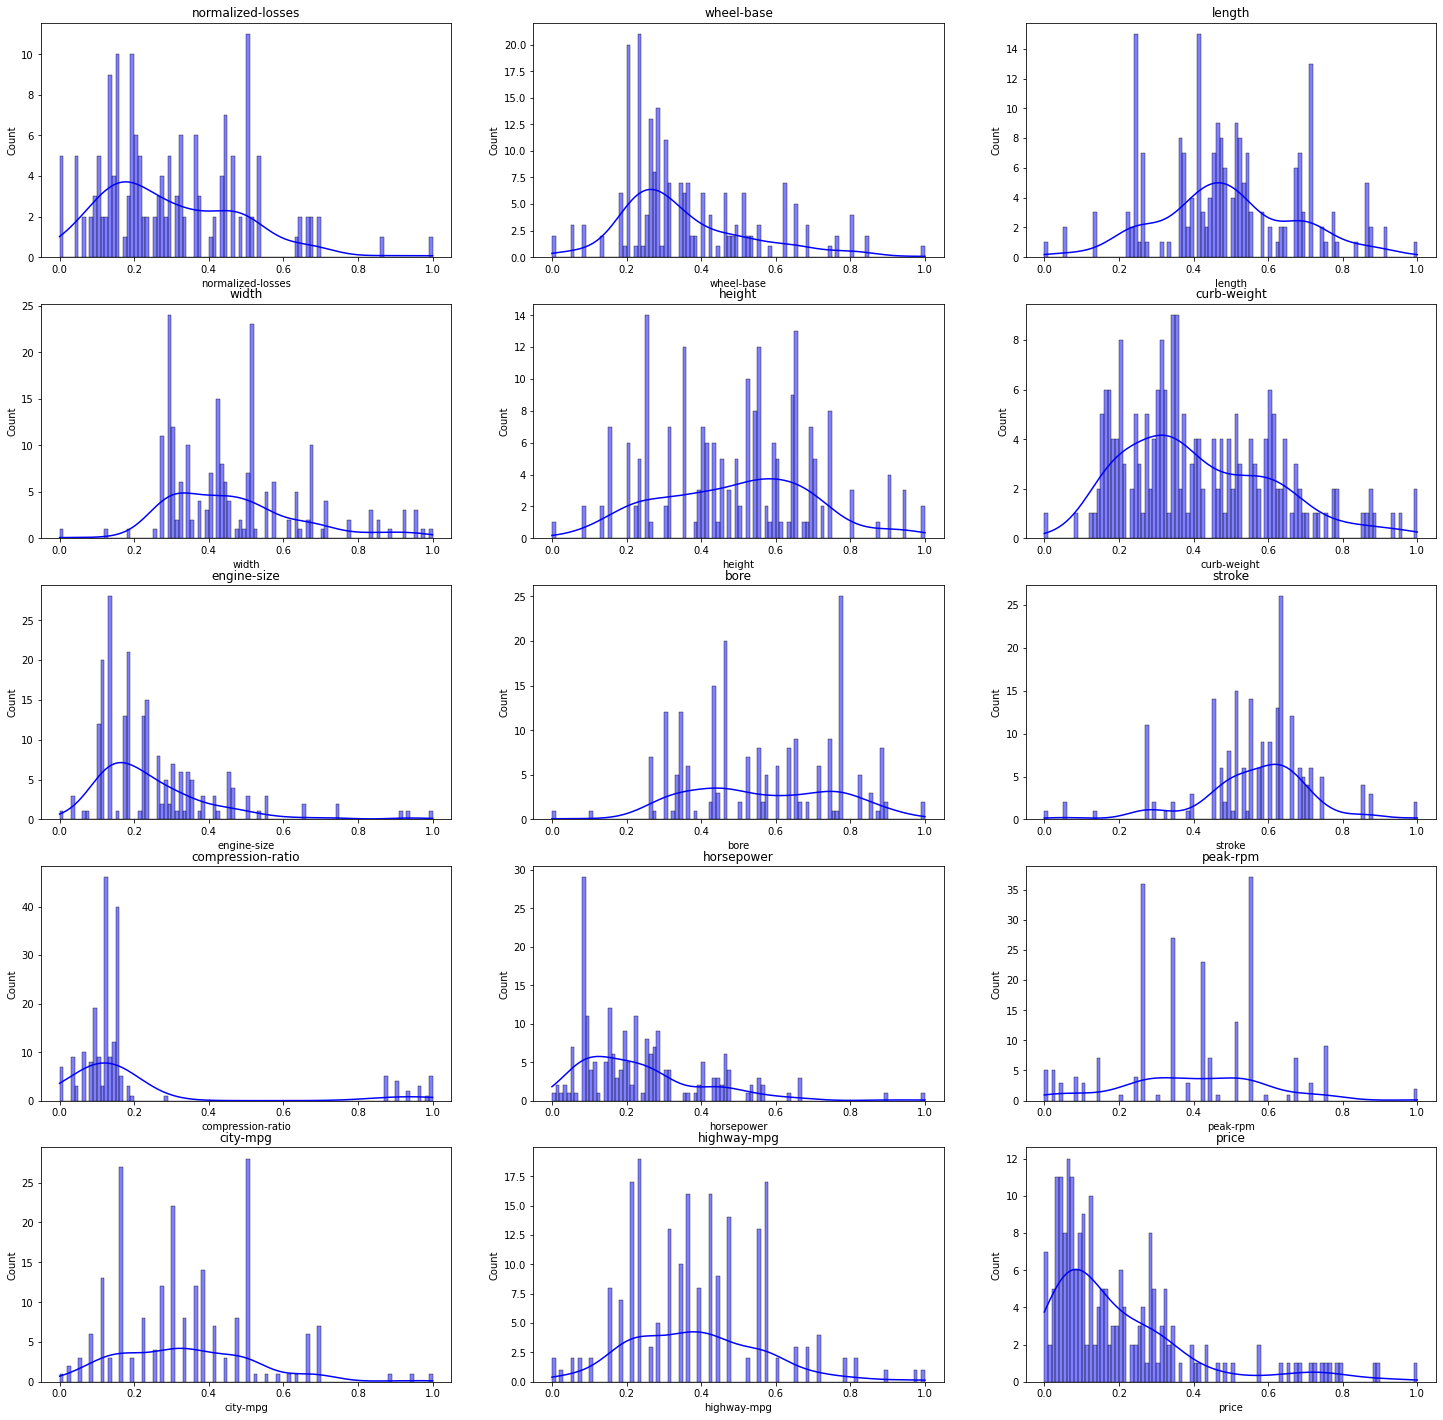

In [82]:
# Seaborn histogram plot
plt.figure(figsize = (25, 25))
for i, col in enumerate(list(df1[["normalized-losses", "wheel-base", "length","width",
                                     "height","curb-weight","engine-size","bore","stroke","compression-ratio",
                                    "horsepower","peak-rpm","city-mpg","highway-mpg","price"]].columns.values)):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df1[col], color = 'b', kde = True, bins = 100)
    plt.title(col)

Machine learning algorithms require relative explanatory variables be normalized.

From the dataset we build "fs_df" is normalized data for all numerical data from the frame, and the data is ready to be studied.

We try to plot the price the other numerical data with scatter plot, see if we can find any relation

In [235]:
y =df["price"].dropna()
y.shape

(201,)

In [239]:
# load PCA + SVM classifier ("SVC") + cross validation functions
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection
data = df[["wheel-base","length","width","curb-weight","engine-size","horsepower","city-mpg","highway-mpg","price"]].dropna()
X = data[["wheel-base","length","width","curb-weight","engine-size","horsepower","city-mpg","highway-mpg"]]
y = data["price"]
# split the data into training + testing subsets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

# create an instance of a PCA model +
# set the number of components you want to retain
pca = PCA(n_components=2)

# apply the PCA function to the training data
pca.fit(X_train)

# display the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)

[0.99563758 0.00323284]


In [240]:
# now apply the results of the PCA to the training data to transform it into 2 principal components per observation
X_t_train = pca.transform(X_train)

# apply the results of the PCA to the testing data to transform it into 2 principal components per observation
X_t_test = pca.transform(X_test)

# create an instance of an SVM classifier
clf = SVC()

# fit the SVM classifier to the transformed training data + the response data
clf.fit(X_t_train, y_train)

# check the accuracy of the SVM classifier using the transformed explanatory variables + the response variable
print ('score', clf.score(X_t_test, y_test) )

score 0.0


In [241]:
print ('pred label', clf.predict(X_t_test) )

pred label [ 5572.  9279. 18150.  7295.  7898.  7898.  8921.  8921. 16500.  7898.
  9279. 16500. 16500.  7295. 18150. 18150.  6229. 16500.  7898.  6229.
  7898.  6692. 36000.  7898.  9279. 16500.  7898.  7898.  7898. 36000.
 25552.  8921.  9279. 18150.  7609. 18150.  7295. 16500.  8845. 18150.
  7898. 18150.  7898. 18150.  7295. 16500. 18150.  6692. 18150. 18150.]


In [1]:
df.head(3)

NameError: name 'df' is not defined

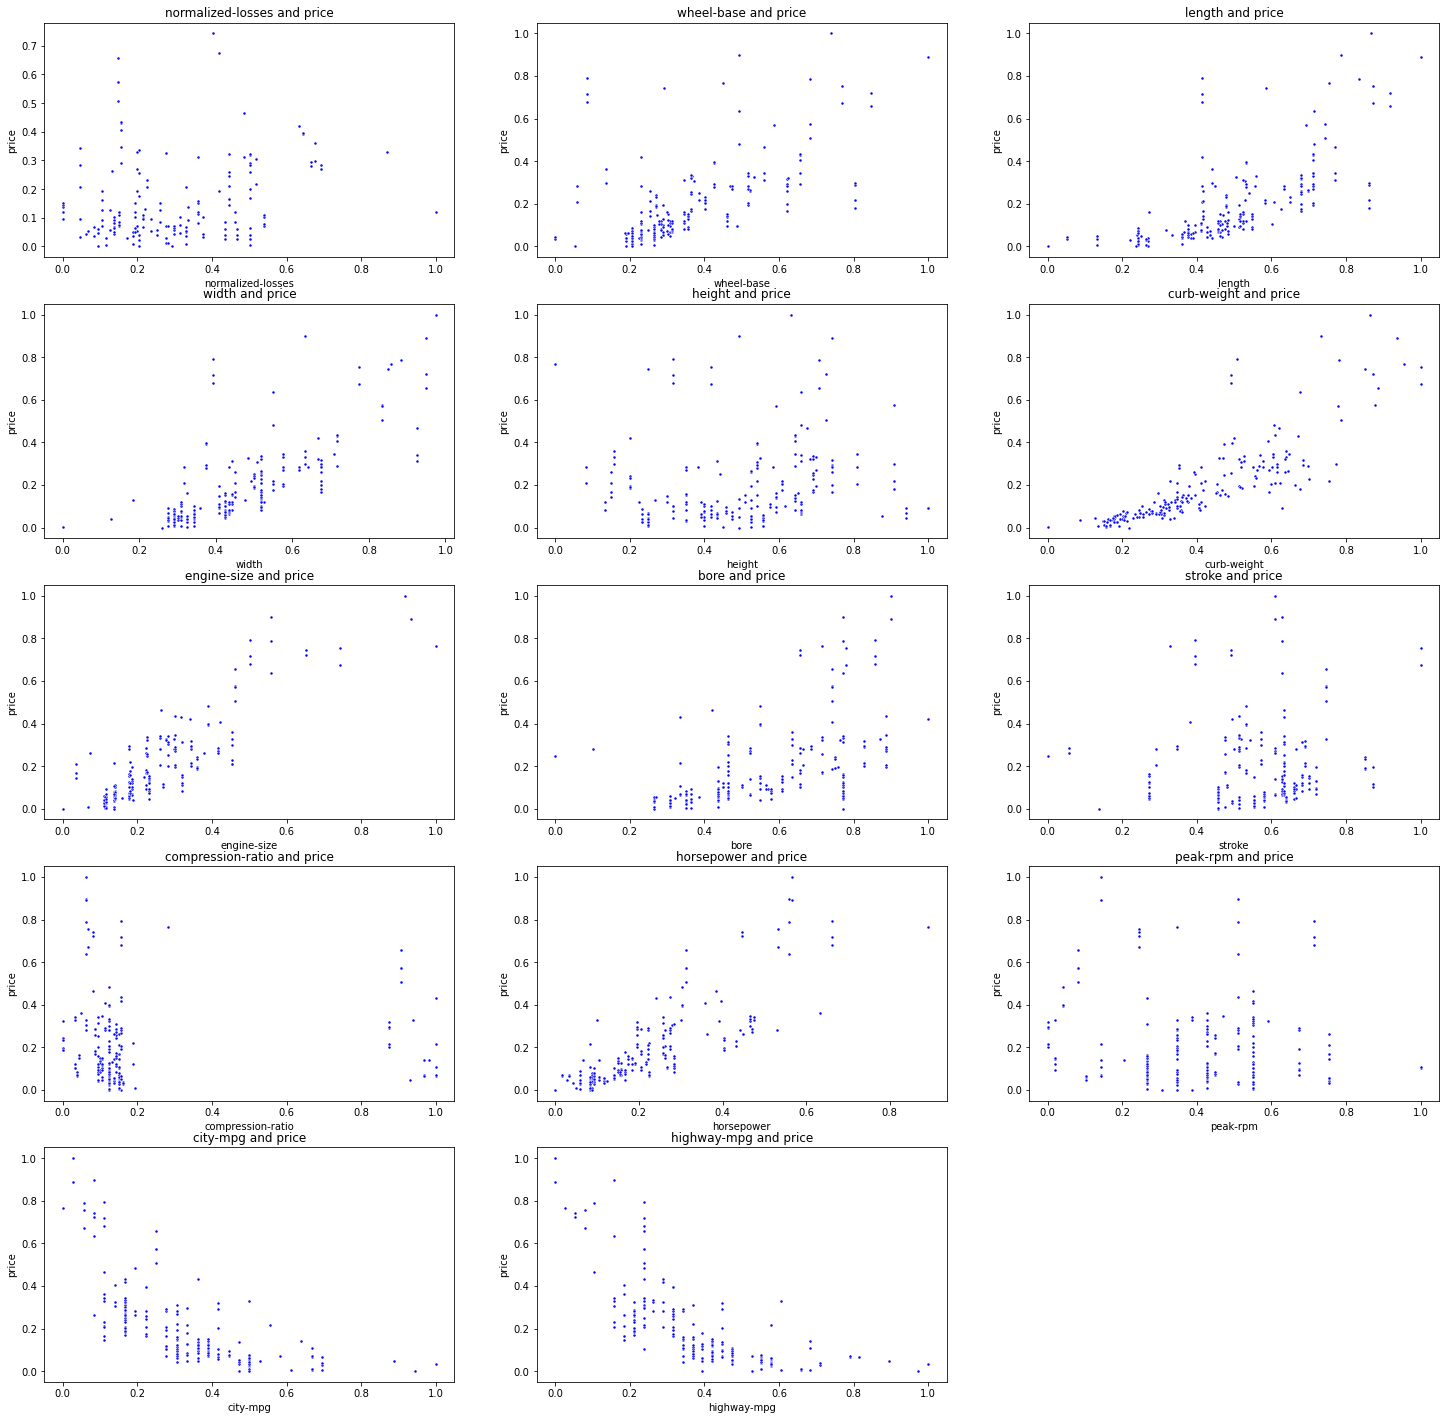

In [97]:
#"normalized-losses", "wheel-base", "length","width",
# "height","curb-weight","engine-size","bore","stroke","compression-ratio",
# "horsepower","peak-rpm","city-mpg","highway-mpg","price"
# Seaborn
plt.figure(figsize = (25, 25))
for i, col in enumerate(list(df1[["normalized-losses", "wheel-base", "length","width",
                                  "height","curb-weight","engine-size","bore","stroke",
                                  "compression-ratio","horsepower","peak-rpm","city-mpg",
                                  "highway-mpg"]].columns.values)):
    plt.subplot(5, 3, i + 1)
    sns.scatterplot(x=df1[col], y=df1['price'], color='b', data=df1, marker=".")
    plt.title(col+' and price')

Most charts above we can see a relation, however with some attributes the relationship is not very signaficant: height, stroke, compression-ratio and peak-rpm
    

## 3.2 Question 2
Consider the number-of-doors and price variables: Based on your EDA work, how many 
missing data values occur within each of these attributes?

In [185]:
df.loc[(df["body-style"]=="sedan")]["num-of-doors"].value_counts(normalize=True)

four    0.840426
two     0.159574
Name: num-of-doors, dtype: float64

In [222]:
data = df[df.price.isnull()]
new_data = data[["curb-weight","engine-size","horsepower","price"]]
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(strategy="most_frequent")
# print(imp.fit_transform(new_data))

from sklearn.preprocessing import Imputer
imputer = Imputer()
print(imputer.fit_transform(new_data["price"]))

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\Jiuge\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [76]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

 As we’ve learned, missing data values can impede the proper functioning of many machine learning algorithms. To address the missing the number-of-doors and price values, you have been instructed to formulate what you believe will be an effective data imputation approach for purposes of estimating reasonable proxies for the missing data values. 
 
 Your supervisor tells you that the affected data observations MUST be retained within the data set, and that it would be inappropriate to use either a mean, median, or mode value for any of the missing values since doing so would increase the likelihood of introducing unwarranted bias within the data set. 
 
 Describe the imputation method you would employ for each variable. Then, using your Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics and commentary that explain your approach as well as the results of your efforts.

To visualize the missing data positions

<AxesSubplot:>

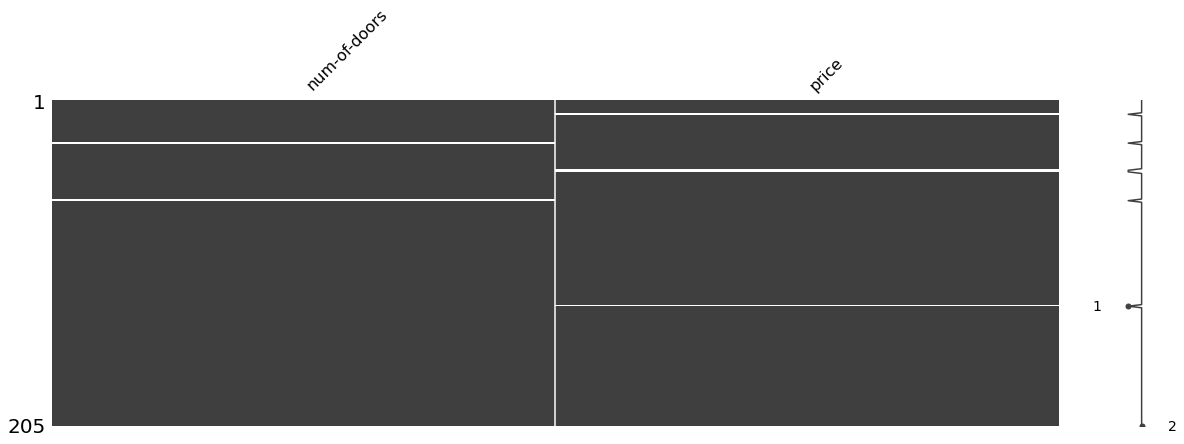

In [182]:
import missingno as mno
mno.matrix(df[["num-of-doors","price"]], figsize = (20, 6))

In [8]:
df[df["price"].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [7]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [11]:
df.loc[(df["make"]=="audi") & (df["aspiration"]=="turbo")& (df["fuel-type"]=="gas")]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160.0,5500.0,16,22,NaN


In [13]:
df["price"] =  df.groupby(['make']).price.transform(lambda x :x.fillna(x.median()))

In [80]:
missing_columns = ["normalized-losses", "bore","stroke","horsepower","peak-rpm","price"]

we try to imputate the data with linear regression method, first we needt to reconfirm the linear relationship of these data

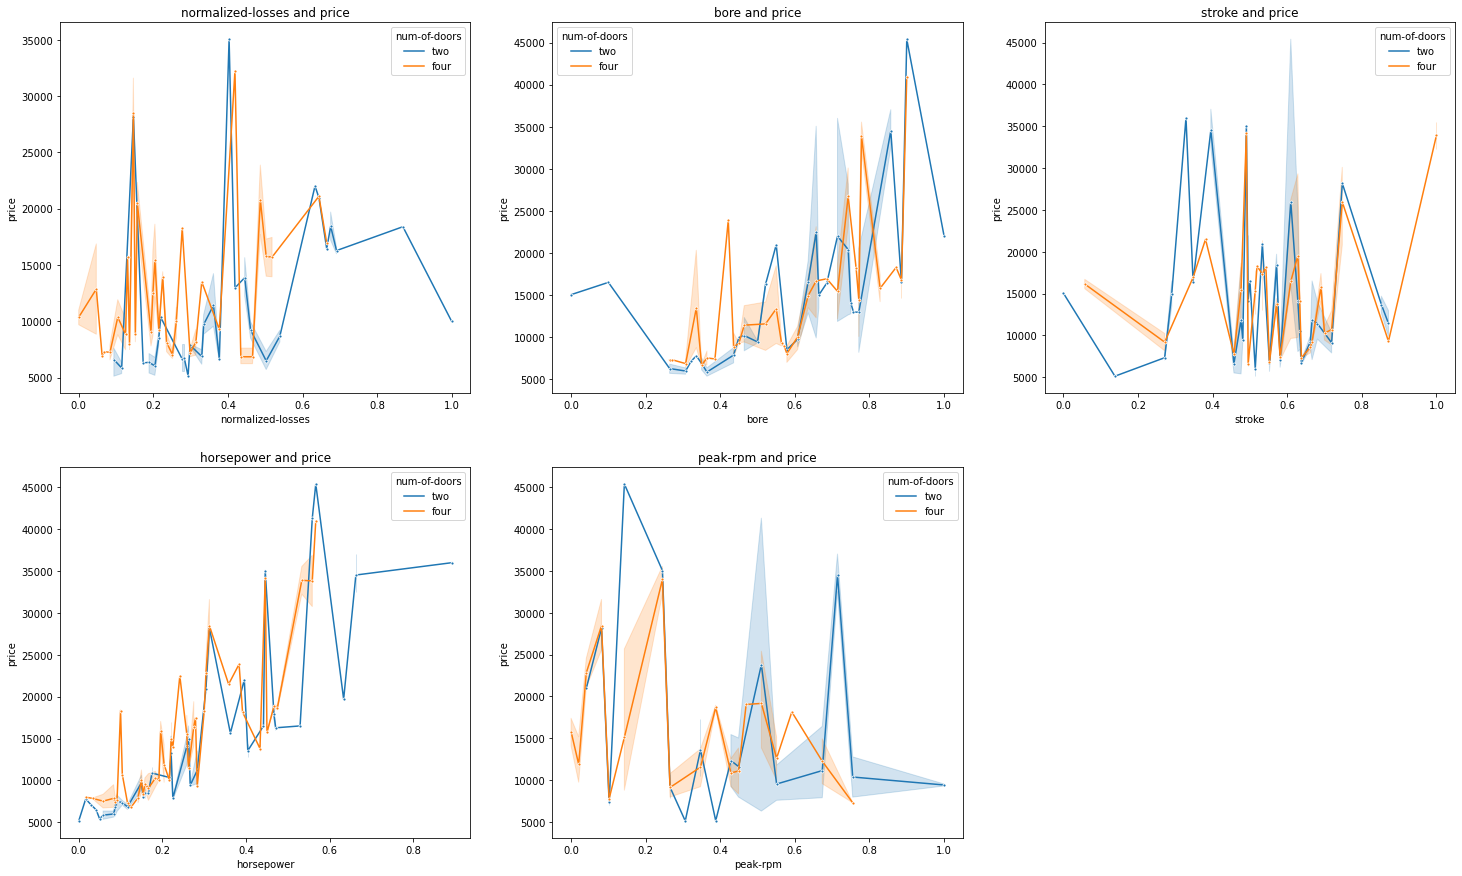

In [100]:
plt.figure(figsize = (25, 15))
for i, col in enumerate(list(df[["normalized-losses", "bore",
                                  "stroke","horsepower","peak-rpm"]].columns.values)):
    plt.subplot(2, 3, i + 1)
    sns.lineplot(x=df1[col], y=df['price'], hue = 'num-of-doors', color='b', data=df, marker=".")
    plt.title(col+' and price') 

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

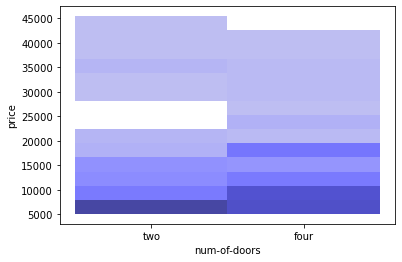

In [181]:
sns.histplot(x=df['num-of-doors'], y=df['price'],  color='b', data=df)

In [189]:
dftry=df[df["num-of-doors"].isnull()]
dftry.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [209]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

symboling             object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
engine-type           object
num-of-cylinders      object
fuel-system           object

TypeError: Horizontal orientation requires numeric `x` variable.

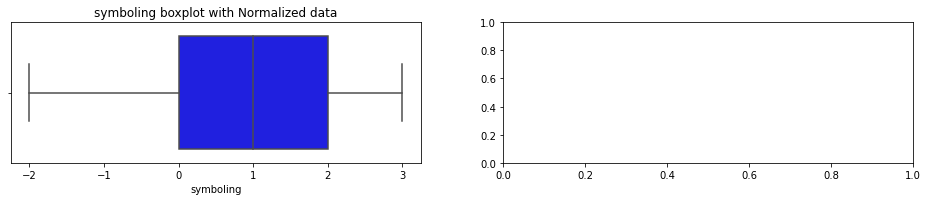

In [268]:
plt.figure(figsize = (25, 15))
for i, col in enumerate(list(df[["symboling","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels",
                                 "engine-location","engine-type","num-of-cylinders","fuel-system"]].columns.values)):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x = df[col], color = 'b')
    plt.title(col+' boxplot with Normalized data')

Since we can see there are linear relation with bore and price and housepower and price.
We are going to try to fill the missing value with linear regression method.

## 3.3 Question 3

 Consider the engine-size and stroke variables: Describe the specific feature scaling method 
you would apply to each of them. Then, using Python, generate both a histogram and a boxplot for the original content of these two variables. Next, apply your prescribed feature scaling methods to the two variables and create histograms and boxplots that show the results of your feature scaling efforts. 

Compare your newly created plots against the plots you created for the original content of the 
variables. Comment on whether your feature scaling efforts improved the distribution of the data. If your feature scaling efforts did not improve the distribution of the data, explain why you believe your efforts were not effective.

### 3.3.1 Normalization Method
𝑋𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒𝑑=(𝑋−𝑚𝑖𝑛(𝑋))/(𝑚𝑎𝑥(𝑋)−𝑚𝑖𝑛(𝑋))

In [329]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
 
dataset = df[["engine-size","stroke"]].dropna()
object= StandardScaler()
 
# Splitting the independent and dependent variables
i_data = np.array(df3["stroke"])
response = np.array(df3["engine-size"])
 
# standardization 
scale = object.fit_transform(i_data) 
print(scale)

ValueError: Expected 2D array, got 1D array instead:
array=[2.68 2.68 3.47 3.4  3.4  3.4  3.4  3.4  3.4  3.4  2.8  2.8  3.19 3.19
 3.19 3.39 3.39 3.39 3.03 3.11 3.11 3.23 3.23 3.39 3.23 3.23 3.23 3.39
 3.46 3.9  3.41 3.41 3.07 3.41 3.41 3.41 3.41 3.58 3.58 3.58 3.58 3.58
 3.58 3.23 3.11 3.11 3.23 4.17 4.17 2.76 3.15 3.15 3.15 3.15 3.15 3.39
 3.39 3.39 3.39 3.39 3.39 3.16 3.64 3.64 3.64 3.64 3.64 3.1  3.1  3.35
 3.35 3.12 3.23 3.23 3.23 3.39 3.46 3.46 3.86 3.86 3.86 3.46 3.46 3.46
 3.46 3.29 3.47 3.29 3.29 3.29 3.29 3.29 3.29 3.29 3.29 3.47 3.47 3.27
 3.27 3.27 3.27 3.27 3.27 3.19 3.52 3.19 3.52 2.19 3.52 2.19 3.52 3.19
 3.52 3.21 3.23 3.39 3.23 3.23 3.23 3.46 3.86 3.11 2.9  2.9  2.9  3.11
 3.9  3.9  3.07 3.07 2.07 3.07 3.07 3.07 2.36 2.64 2.64 2.64 2.64 2.64
 2.64 2.64 2.64 2.64 2.64 2.64 3.03 3.03 3.03 3.03 3.03 3.03 3.03 3.03
 3.35 3.35 3.03 3.03 3.03 3.03 3.03 3.08 3.08 3.5  3.5  3.5  3.5  3.5
 3.5  3.54 3.35 3.54 3.54 3.54 3.35 3.35 3.35 3.35 3.4  3.4  3.4  3.4
 3.4  3.4  3.4  3.4  3.4  3.4  3.4  3.4  3.15 3.15 3.15 3.15 3.15 3.15
 3.15 3.15 2.87 3.4  3.15].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [325]:
from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing
df3 = df[["engine-size","stroke"]].dropna()
# X1 = np.array(df3["engine-size"])
# X2 = np.array(df3["stroke"])

# y1 = preprocessing.normalize([X1],norm='l2').transpose()
# y2 = preprocessing.normalize([X2]).transpose()
# y2

scaler = StandardScaler()
# scaler.fit(df3)
scaler.transform(df3)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [101]:
fs_list = ["engine-size","stroke"]
df3 = pd.DataFrame()
for i in fs_list:
    df3[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())
df3.head(3)

,engine-size,stroke
0,0.260377,0.290476
1,0.260377,0.290476
2,0.343396,0.666667


#### 3.3.1.1 Histograms

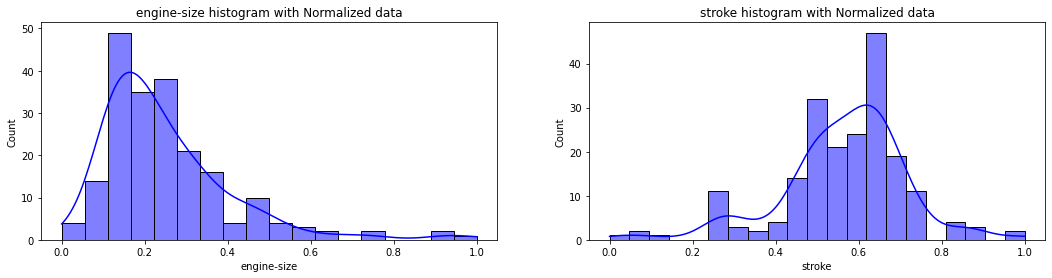

In [123]:
plt.figure(figsize = (18, 4))
for i, col in enumerate(list(df3[["engine-size","stroke"]].columns.values)):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df3[col], color = 'b', kde = True)
    plt.title(col+' histogram with Normalized data')

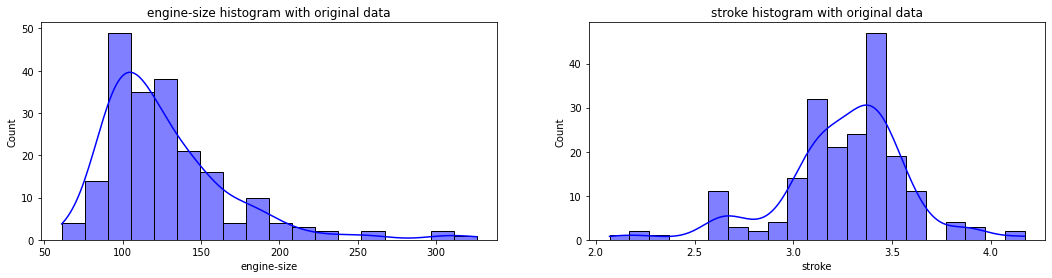

In [122]:
plt.figure(figsize = (18, 4))
for i, col in enumerate(list(df[["engine-size","stroke"]].columns.values)):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], color = 'b', kde = True)
    plt.title(col+' histogram with original data')

#### 3.3.1.2 Boxplots 

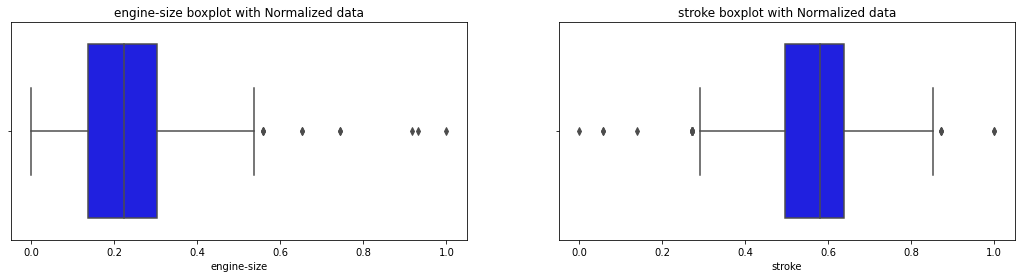

In [127]:
plt.figure(figsize = (18, 4))
for i, col in enumerate(list(df3[["engine-size","stroke"]].columns.values)):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x = df3[col], color = 'b')
    plt.title(col+' boxplot with Normalized data')

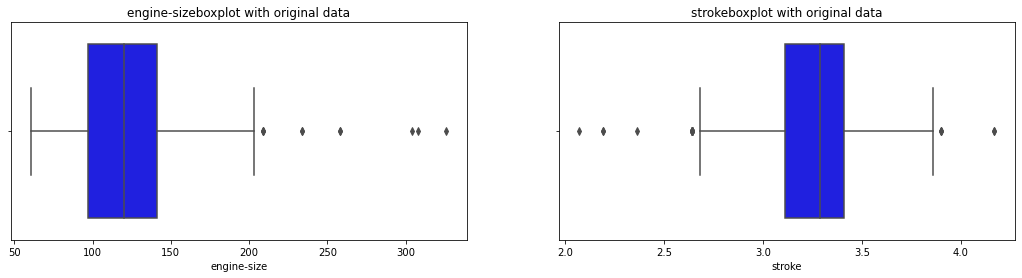

In [126]:
plt.figure(figsize = (18, 4))
for i, col in enumerate(list(df[["engine-size","stroke"]].columns.values)):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x = df[col], color = 'b')
    plt.title(col+'boxplot with original data')

### 3.3.2  Standardization Method
𝑥′=(𝑥−𝑚𝑒𝑎𝑛(𝑋))/𝑠𝑡𝑎𝑛𝑑𝑑𝑒𝑣(𝑋)  

In [103]:
fs_list = ["engine-size","stroke"]
df_3 = pd.DataFrame()
for i in fs_list:
    df_3[i]=(df[i]-df[i].mean())/(df[i].std())
df_3.head(3)

,engine-size,stroke
0,0.074267,-1.816834
1,0.074267,-1.816834
2,0.602571,0.677503


#### 3.3.2.1 Histograms

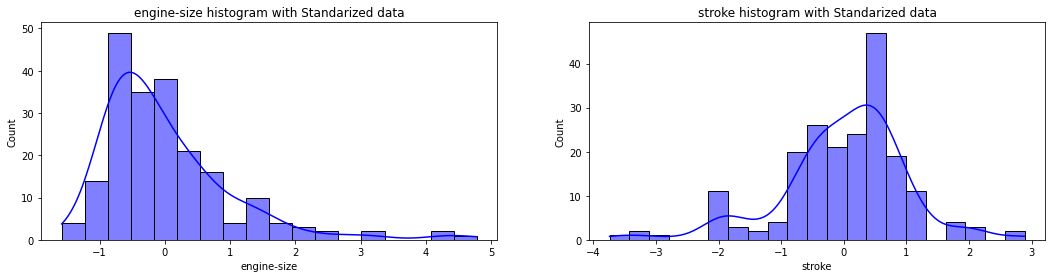

In [124]:
plt.figure(figsize = (18, 4))
for i, col in enumerate(list(df_3[["engine-size","stroke"]].columns.values)):
    plt.subplot(1, 2, i + 1)
    sns.histplot(x = df_3[col], color = 'b',kde = True)
    plt.title(col+' histogram with Standarized data')

#### 3.3.2.2 Boxplots

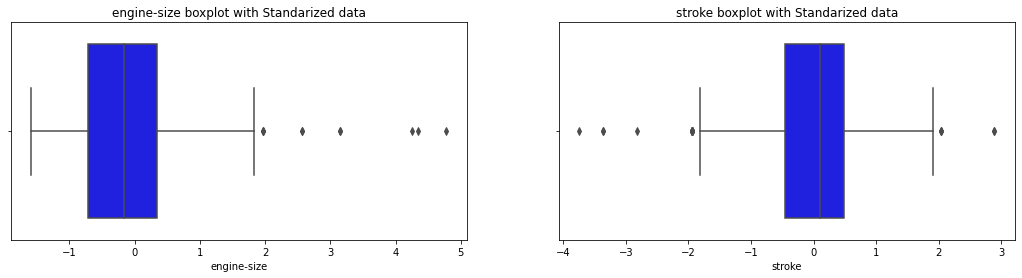

In [125]:
plt.figure(figsize = (18, 4))
for i, col in enumerate(list(df_3[["engine-size","stroke"]].columns.values)):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x = df_3[col], color = 'b')
    plt.title(col+' boxplot with Standarized data')

## 3.4 Question 4
 Consider the symboling, make, and engine-type variables:

In [132]:
df4=df[["symboling", "make","engine-type"]]
df4.head(3)

,symboling,make,engine-type
0,3,alfa-romero,dohc
1,3,alfa-romero,dohc
2,1,alfa-romero,ohcv


### 3.4.1 Question A
        
A) For each variable, specify whether its content is numeric/continuous, numeric/discrete, 
categorical/nominal, or categorical/ordinal

In [134]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   symboling    205 non-null    object
 1   make         205 non-null    object
 2   engine-type  205 non-null    object
dtypes: object(3)
memory usage: 4.9+ KB


As we can see from the chart above, the three attributes are categorical variables. The next step is to find out if they are nominal or ordinal.

In [136]:
df4["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

From the result we see above,"symboling" is an ordinal variable

In [137]:
df4["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

From the result we see above, "make" is a nominal variable.

In [138]:
df4["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

From the result we see above, "engine-type" is a nominal variable.

### 3.4.2 Question B

B) For each variable, describe the methodology you would employ for purposes of preparing its data values for use within a machine learning algorithm.

In [140]:
# isolate the rows containing the null symboling, make, and engine-type variables
df4.isnull().sum()

symboling      0
make           0
engine-type    0
dtype: int64

There is no null value in the selected dataset

In [143]:
df4.describe()

,symboling,make,engine-type
count,205,205,205
unique,6,22,7
top,0,toyota,ohc
freq,67,32,148


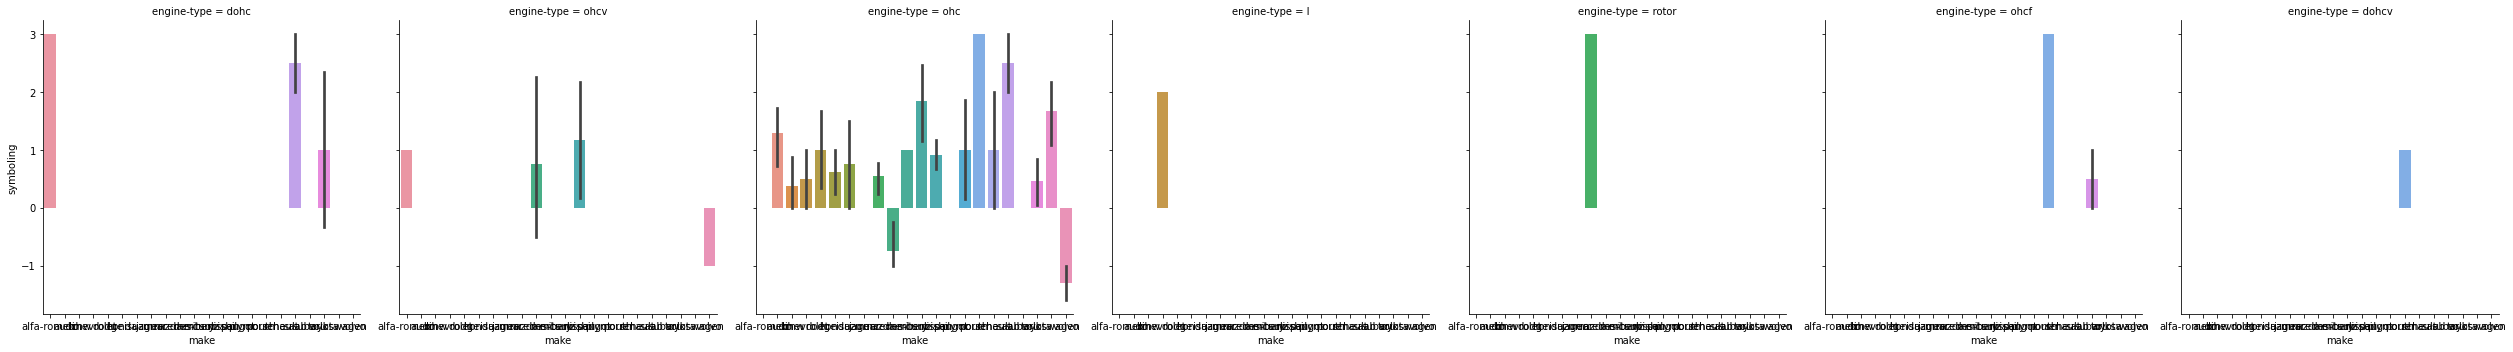

In [170]:
sns.catplot(x='make', y='symboling', col='engine-type',
               kind='bar', data= df4, dodge=True)

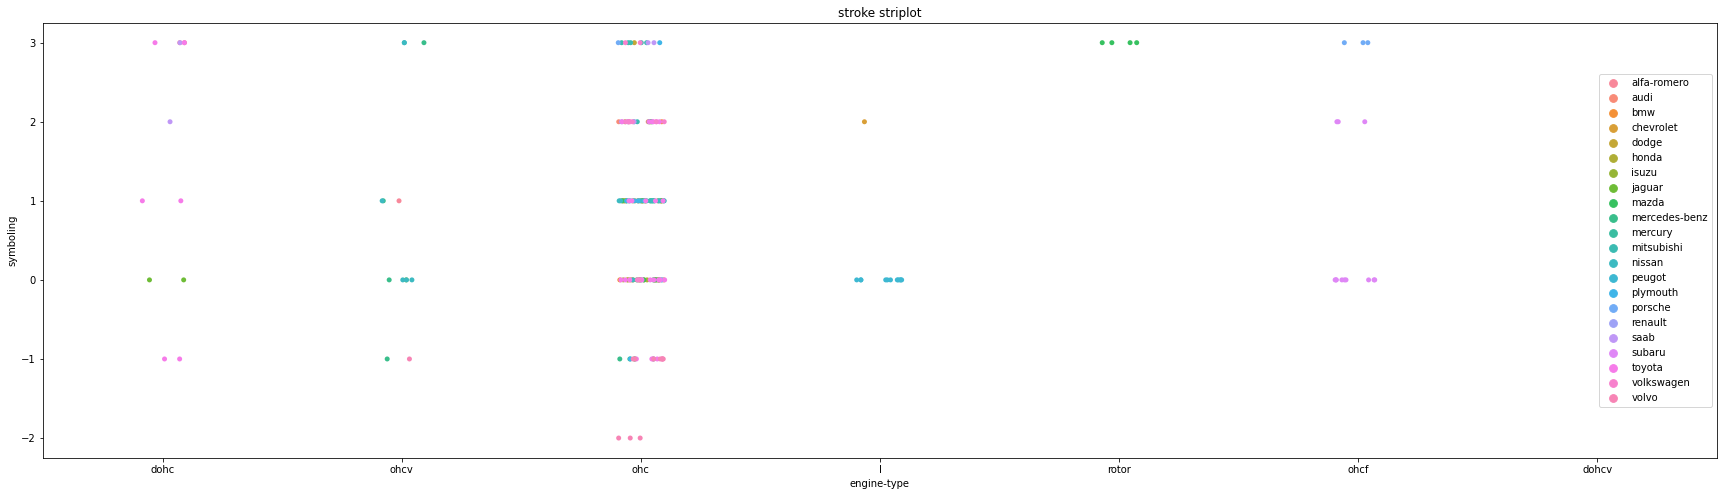

In [168]:
plt.figure(figsize = (30, 8))
# color_plate = sns.color_palette("flare")
sns.stripplot(data=df4, x="engine-type", y="symboling", hue="make" )
plt.title(col+' striplot')
plt.legend(loc='right')

### 3.4.3 Question C
C) Using your Python skills, apply your prescribed data preparation methodologies to the three 
variables. Be sure to show a sample of your results within you Jupyter Notebook.


## 3.5 Question 5
Consider the wheel-base, length, width, height, curb-weight, engine-size, compressionratio, horsepower, peak-rpm, and city-mpg variables. Using your dimensionality reduction expertise, 
use Python to reduce the dimensionality of this group of variables to a set of new orthogonal features. 
Be sure to include appropriate commentary explaining the dimensionality reduction method you have 
elected to implement and discuss the results of your efforts. For example, you should explain how 
many orthogonal features your approach has generated as well as how much variability is explained by 
each of your new features.

In [175]:
df5 = df[["wheel-base", "length", "width", "height", "curb-weight", 
          "engine-size", "compression-ratio", "horsepower", "peak-rpm", "city-mpg"]]
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         205 non-null    float64
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   curb-weight        205 non-null    int64  
 5   engine-size        205 non-null    int64  
 6   compression-ratio  205 non-null    float64
 7   horsepower         203 non-null    float64
 8   peak-rpm           203 non-null    float64
 9   city-mpg           205 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 16.1 KB


Dimensionality reduction can be done in two different ways:

* By only keeping the most relevant variables from the original dataset (this technique is called feature selection)
* By finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables (this technique is called dimensionality reduction)

In unsupervised algorithms, we try to understand the data without looking at the labels, instead we analyze the distribution of data and recognize patterns, such as finding clusters and orthogonal features.

In [ ]:
# Basic packages
import numpy as np
import pandas as pd 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Scikit-learn package
from sklearn.preprocessing import StandardScaler



# Generate X and y
X = dataset.drop(columns=['Species'])
y = dataset['Species']

# Standardization
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X = X.rename(columns={0:'SepalLengthCm',1:'SepalWidthCm',2:'PetalLengthCm',3:'PetalWidthCm'})

# Singular Value Decoposition
u,s,v = np.linalg.svd(X)

# Estimate singular values
singular_values = s*s/(X.shape[0]-1)

# Top k=2 singular values and corresponding eigenvectors
k = 2
print(f"Top {k} eigen values:")
print(singular_values[:k])

print(f"Top {k} eigen vectors:")
print(v.T[:,0])
print(v.T[:,1])

print('Projection matrix is: ')
print(v.T[:,:2])

# Data in reduced dimension
X_reduced = np.matmul(np.array(X),v.T[:,:2])
pd.DataFrame(X_reduced)

# Visualize the samples in reduced space
dataset_new = pd.concat([pd.DataFrame(X_reduced),pd.DataFrame(dataset['Species'])], axis=1)
dataset_new = dataset_new.rename(columns={0:"feature_1",1:"feature_2"})
ax = sns.scatterplot(x="feature_1", y="feature_2", hue="Species", data=dataset_new)
plt.show()

print('Plot of principal components estimated using scikit-learn')
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced_scikit = pca.fit_transform(X)
dataset_new_scikit = pd.concat([pd.DataFrame(X_reduced_scikit),pd.DataFrame(dataset['Species'])], axis=1)
dataset_new_scikit = dataset_new.rename(columns={0:"feature_1",1:"feature_2"})
ax = sns.scatterplot(x="feature_1", y="feature_2", hue="Species", data=dataset_new_scikit)
plt.show()